How do Nitya's best-fit $\phi$ values compare to those listed in the SGA?

In [3]:
import numpy as np

from astropy.table import Table
import astropy.constants as const
import astropy.units as u

import matplotlib.pyplot as plt
import matplotlib as mpl

import os
# rotcurvepath = os.path.join(os.environ['HOME'], 'RotationCurves/spirals')
rotcurvepath = os.path.join(os.environ['HOME'], 'Documents/Research/Rotation_curves/RotationCurves/spirals/')
import sys
sys.path.insert(1, rotcurvepath)
from dark_matter_mass_v1 import rot_fit_BB

In [4]:
mpl.rc('font', size=12)

In [5]:
h = 1
H0 = 100*h*u.km/u.s/u.Mpc

c = const.c.to('km/s')

q0 = 0.2

# Import data

## SGA

In [6]:
# SGA = Table.read('/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits', 'ELLIPSE')
SGA = Table.read('/Users/kdouglass/Documents/Research/data/SGA/SGA-2020.fits', 'ELLIPSE')

In [7]:
SGA_dict = {}

for i in range(len(SGA)):
    
    SGA_dict[SGA['SGA_ID'][i]] = i

## SGA MaNGA cross-match file

In [8]:
SGA_MaNGA = Table.read('../MaNGA_SGA_crossmatch_2022-06-28.txt', format='ascii.commented_header')

SGA_MaNGA[:5]

plate,ifudsgn,plateifu,SGA_ID
int64,int64,str11,int64
8716,3703,8716-3703,927743
9086,6104,9086-6104,1003700
11967,1902,11967-1902,196166
8613,6104,8613-6104,376271
10001,3703,10001-3703,937846


## SDSS MaNGA best-fits

Nitya's fitting from 2023 on DR17

In [20]:
'''
MaNGA_fits = Table.read(#'master_table_Halpha_BB_HI_H2_MxCG_R90_CMD.txt', 
                        'master_table_Halpha_BB_HI_H2_MxCG_R90_CMD_ZPG16R_SFR_MZ.txt', 
                        format='ascii.commented_header')
'''
MaNGA_fits = Table.read('/Users/kdouglass/Documents/Research/Rotation_curves/Nitya_Ravi/H_alpha_HIvel_BB_refit_ba.fits')
MaNGA_fits[:10]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,10001-12701,1-48157,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.0835,41.292,ma079,22,3,9114,134.41357,57.604214,1.10715,1.15321,1.21404,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.69906,2.64546,2.59645,2.54039,2080,0,0,1,plateTargets-1.par,6013,J085329.03+573554.9,127,127,0,0.0392074,0.0193562,0.0264775,0.0386959,0.0429176,0.0193562,0.0264775,0.748562,-999.0,0.665321,0.705378,1.08789,1.19925,-9

In [22]:
MaNGA_fits['plateifu'][9]

'10001-3703'

In [21]:
SGA_MaNGA['plateifu'][4]

np.str_('10001-3703')

In [23]:
MaNGA_fits['plateifu'][9] == SGA_MaNGA['plateifu'][4]

True

# Add SGA parameters to the cross-match table

In [10]:
SGA_MaNGA['R26'] = np.nan
SGA_MaNGA['BA'] = np.nan
SGA_MaNGA['PA'] = np.nan

for i in range(len(SGA_MaNGA)):
    
    # Find the row in SGA for this galaxy
    SGA_idx = SGA_dict[SGA_MaNGA['SGA_ID'][i]]
    
    # Transfer R26 over to the SGA_MaNGA table
    SGA_MaNGA['R26'][i] = 0.5*SGA['D26'][SGA_idx]
    
    # Transfer b/a over to the SGA_MaNGA table
    SGA_MaNGA['BA'][i] = SGA['BA'][SGA_idx]
    
    # Transfer phi over to the SGA_MaNGA table
    SGA_MaNGA['PA'][i] = SGA['PA'][SGA_idx]

# Add the MaNGA best-fit values to the cross-match table

In [25]:
SGA_MaNGA['Vmax_map'] = np.nan
SGA_MaNGA['Vmax_err_map'] = np.nan
SGA_MaNGA['Rturn_map'] = np.nan
SGA_MaNGA['alpha_map'] = np.nan

SGA_MaNGA['ba_map'] = np.nan
SGA_MaNGA['ba_err_map'] = np.nan
SGA_MaNGA['ba_NSA'] = np.nan

SGA_MaNGA['phi_map'] = np.nan
SGA_MaNGA['phi_err_map'] = np.nan
SGA_MaNGA['phi_NSA'] = np.nan

SGA_MaNGA['Z_NSA'] = np.nan

for i in range(len(SGA_MaNGA)):
    
    gal_id = SGA_MaNGA['plateifu'][i]
    
    # Find galaxy row in MaNGA fits table
    '''
    plate_bool = MaNGA_fits['MaNGA_plate'] == SGA_MaNGA['plate'][i]
    ifu_bool = MaNGA_fits['MaNGA_IFU'] == SGA_MaNGA['ifudsgn'][i]

    i_fit = plate_bool & ifu_bool
    '''
    i_fit = MaNGA_fits['plateifu'] == SGA_MaNGA['plateifu'][i]
    
    # Copy best-fit parameter values from fit table to galaxy table
    if (np.sum(i_fit) > 0): #and (gal_id not in []):
        '''
        SGA_MaNGA['Vmax_map'][i] = MaNGA_fits['Vmax_map'][i_fit]
        SGA_MaNGA['Vmax_err_map'][i] = MaNGA_fits['Vmax_err_map'][i_fit]
        SGA_MaNGA['Rturn_map'][i] = MaNGA_fits['Rturn_map'][i_fit]
        SGA_MaNGA['alpha_map'][i] = MaNGA_fits['alpha_map'][i_fit]
        
        SGA_MaNGA['ba_map'][i] = MaNGA_fits['ba_map'][i_fit]
        SGA_MaNGA['ba_err_map'][i] = MaNGA_fits['ba_err_map'][i_fit]
        SGA_MaNGA['ba_NSA'][i] = MaNGA_fits['NSA_ba'][i_fit]
        
        SGA_MaNGA['phi_map'][i] = MaNGA_fits['phi_map'][i_fit]
        SGA_MaNGA['phi_err_map'][i] = MaNGA_fits['phi_err_map'][i_fit]
        SGA_MaNGA['phi_NSA'][i] = MaNGA_fits['NSA_phi'][i_fit]
        
        SGA_MaNGA['Z_NSA'][i] = MaNGA_fits['NSA_redshift'][i_fit]
        '''
        SGA_MaNGA['Vmax_map'][i] = MaNGA_fits['v_max'][i_fit]
        SGA_MaNGA['Vmax_err_map'][i] = MaNGA_fits['v_max_err'][i_fit]
        SGA_MaNGA['Rturn_map'][i] = MaNGA_fits['r_turn'][i_fit]
        SGA_MaNGA['alpha_map'][i] = MaNGA_fits['alpha'][i_fit]
        
        SGA_MaNGA['ba_map'][i] = MaNGA_fits['ba'][i_fit]
        SGA_MaNGA['ba_err_map'][i] = MaNGA_fits['ba_err'][i_fit]
        SGA_MaNGA['ba_NSA'][i] = MaNGA_fits['nsa_elpetro_ba'][i_fit]
        
        SGA_MaNGA['phi_map'][i] = MaNGA_fits['phi'][i_fit]
        SGA_MaNGA['phi_err_map'][i] = MaNGA_fits['phi_err'][i_fit]
        SGA_MaNGA['phi_NSA'][i] = MaNGA_fits['nsa_elpetro_phi'][i_fit]
        
        SGA_MaNGA['Z_NSA'][i] = MaNGA_fits['nsa_z'][i_fit]
        
# Flip all -999 values to NaN
for col_name in SGA_MaNGA.colnames:
    
    bad_values = SGA_MaNGA[col_name] == -999
    
    if np.any(bad_values):
        SGA_MaNGA[col_name][bad_values] = np.nan

/Users/kdouglass/miniforge3/lib/python3.10/site-packages/astropy/table/column.py:1376: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value


# Remove galaxies with bad MaNGA fits

In [27]:
# 1 - Convert R26 to kpc for each galaxy
dist_to_galaxy = SGA_MaNGA['Z_NSA']*c/H0
R26_kpc = dist_to_galaxy.to('kpc')*np.tan((SGA_MaNGA['R26']*u.arcmin).to(u.rad))

# 2 - Compute V(R26)
SGA_MaNGA['Vfit_R26'] = rot_fit_BB(R26_kpc.data, [SGA_MaNGA['Vmax_map'], SGA_MaNGA['Rturn_map'], SGA_MaNGA['alpha_map']])

# 3 - Filter out those with V(R26) < 0.9Vmax
goodVmax = SGA_MaNGA['Vfit_R26'] >= 0.9*SGA_MaNGA['Vmax_map']
print(sum(goodVmax))

# 4 - Filter out those with Vmax > 1000 km/s
lowVmax = SGA_MaNGA['Vmax_map'] < 1000.
print(sum(lowVmax))

# 5 - Filter out those with alpha > 99
good_alpha = SGA_MaNGA['alpha_map'] < 99.
print(sum(good_alpha))

# 6 - Filter out those with large uncertainties in Vmax
goodVmax2 = SGA_MaNGA['Vmax_err_map']/SGA_MaNGA['Vmax_map'] <= 2
print(sum(goodVmax2))

final_sample = goodVmax & lowVmax & good_alpha & goodVmax2

4071
4931
4930
4968


In [28]:
len(SGA_MaNGA[final_sample])

3973

# Identify galaxies with $i > 45^\circ$

These objects are not included in the TF calibration.

In [29]:
SGA_MaNGA['cosi2'] = (SGA_MaNGA['BA']**2 - q0**2)/(1 - q0**2)
SGA_MaNGA['cosi2'][SGA_MaNGA['cosi2'] < 0] = 0

In [30]:
i_min = 45. # degrees

cosi2_max = np.cos(i_min*np.pi/180.)**2

edge = SGA_MaNGA['cosi2'] <= cosi2_max

final_sample_edge = final_sample & edge

In [31]:
len(SGA_MaNGA[final_sample_edge])

2806

# Compute differences between SGA and MaNGA

## $\Delta \phi$

In [32]:
SGA_MaNGA['delta_phi'] = SGA_MaNGA['phi_map']%180. - SGA_MaNGA['PA']

SGA_MaNGA['delta_phi'][np.abs(SGA_MaNGA['delta_phi']) >= 90.] = 180. - np.abs(SGA_MaNGA['delta_phi'][np.abs(SGA_MaNGA['delta_phi']) >= 90.])

## $\Delta \csc i$

In [33]:
SGA_MaNGA['cosi2_map'] = (SGA_MaNGA['ba_map']**2 - q0**2)/(1 - q0**2)
SGA_MaNGA['cosi2_map'][SGA_MaNGA['cosi2_map'] < 0] = 0

In [34]:
csci_SGA = 1/np.sqrt(1 - SGA_MaNGA['cosi2'])
csci_MaNGA = 1/np.sqrt(1 - SGA_MaNGA['cosi2_map'])

SGA_MaNGA['delta_csci'] = csci_MaNGA - csci_SGA

/var/folders/mg/fxh1s24d0n3_r0c39d3gs0g00000gq/T/ipykernel_62636/1857975444.py:1: RuntimeWarning: divide by zero encountered in divide
  csci_SGA = 1/np.sqrt(1 - SGA_MaNGA['cosi2'])


# Plots

## $\phi$

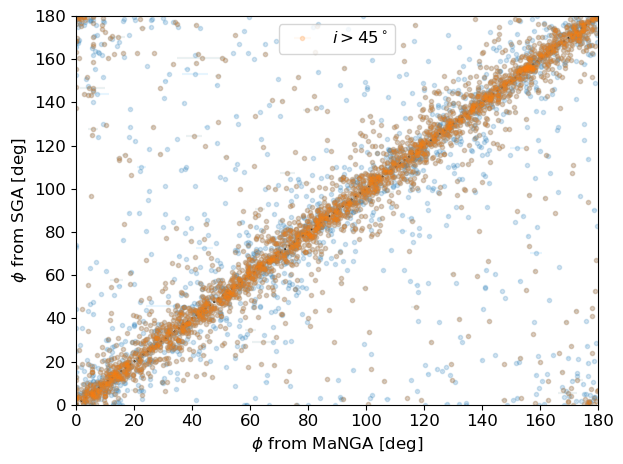

In [35]:
plt.figure(tight_layout=True)

plt.errorbar(SGA_MaNGA['phi_map'][final_sample]%180., SGA_MaNGA['PA'][final_sample], 
             xerr=SGA_MaNGA['phi_err_map'][final_sample], 
             fmt='.', 
             ecolor='lightskyblue', 
             alpha=0.2)
plt.errorbar(SGA_MaNGA['phi_map'][final_sample_edge]%180., SGA_MaNGA['PA'][final_sample_edge], 
             xerr=SGA_MaNGA['phi_err_map'][final_sample_edge], 
             fmt='.', 
             ecolor='bisque', 
             alpha=0.2, 
             label='$i > 45^\circ$')
plt.plot([0,180], [0,180], 'k:')

plt.xlim([0, 180])
plt.ylim([0, 180])

plt.legend()
             
plt.xlabel('$\phi$ from MaNGA [deg]')
plt.ylabel('$\phi$ from SGA [deg]');

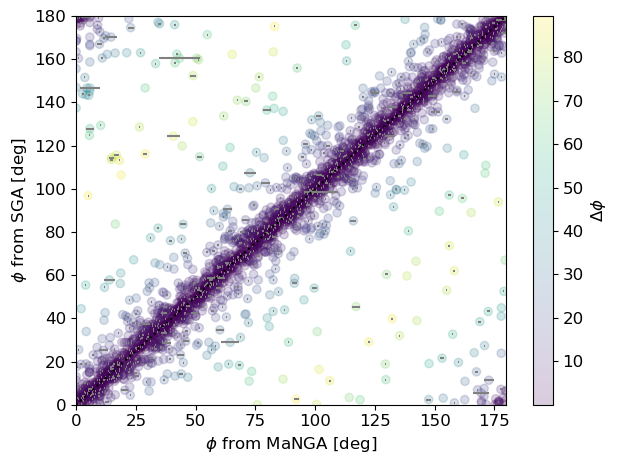

In [36]:
plt.figure(tight_layout=True)

plt.errorbar(SGA_MaNGA['phi_map'][final_sample_edge]%180., SGA_MaNGA['PA'][final_sample_edge], 
             xerr=SGA_MaNGA['phi_err_map'][final_sample_edge], 
             fmt='None',
             ecolor='gray')
plt.scatter(SGA_MaNGA['phi_map'][final_sample_edge]%180., SGA_MaNGA['PA'][final_sample_edge], 
            c=np.abs(SGA_MaNGA['delta_phi'][final_sample_edge]), 
            alpha=0.2)
plt.plot([0,180], [0,180], 'k:')

plt.xlim([0, 180])
plt.ylim([0, 180])

plt.colorbar(label='$\Delta \phi$')

plt.xlabel('$\phi$ from MaNGA [deg]')
plt.ylabel('$\phi$ from SGA [deg]');

In [37]:
np.std(SGA_MaNGA['delta_phi'][final_sample]), np.std(SGA_MaNGA['delta_phi'][final_sample_edge])

(np.float64(20.516878962994266), np.float64(15.629925848543111))

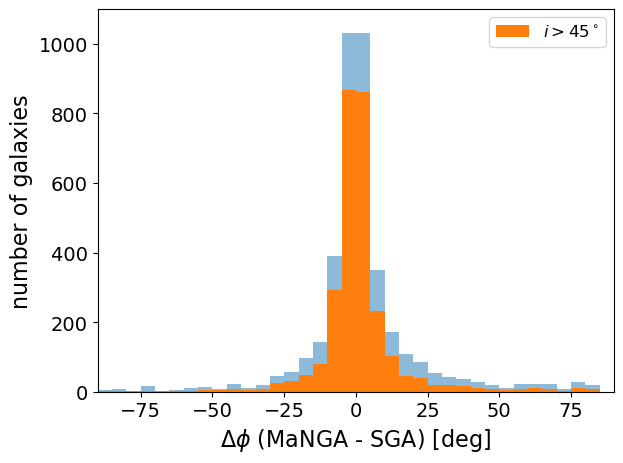

In [38]:
plt.figure(tight_layout=True)

plt.hist(SGA_MaNGA['delta_phi'][final_sample], 
         bins=np.arange(-90, 90, 5), 
         alpha=0.5)
plt.hist(SGA_MaNGA['delta_phi'][final_sample_edge], 
         bins=np.arange(-90, 90, 5), 
         label='$i > 45^\circ$')

plt.xlim([-90, 90])
plt.ylim([0, 1100])

plt.legend()

plt.tick_params(axis='both', which='major', labelsize=14)

plt.xlabel('$\Delta \phi$ (MaNGA - SGA) [deg]', fontsize=16)
plt.ylabel('number of galaxies', fontsize=16);

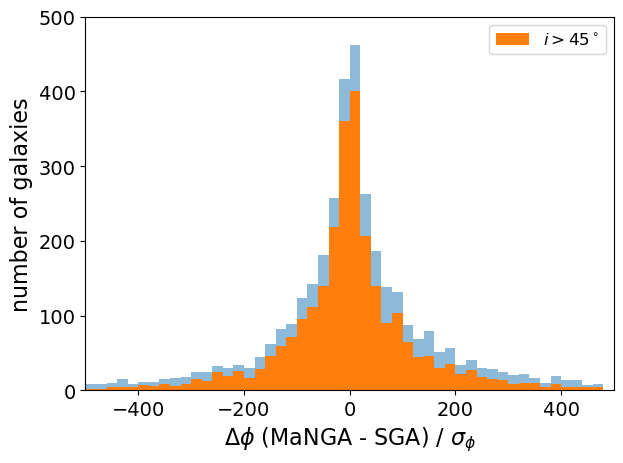

In [39]:
plt.figure(tight_layout=True)

plt.hist(SGA_MaNGA['delta_phi'][final_sample]/SGA_MaNGA['phi_err_map'][final_sample], 
         bins=np.arange(-500, 500, 20), 
         alpha=0.5)
plt.hist(SGA_MaNGA['delta_phi'][final_sample_edge]/SGA_MaNGA['phi_err_map'][final_sample_edge], 
         bins=np.arange(-500, 500, 20), 
         label='$i > 45^\circ$')

plt.xlim([-500, 500])
plt.ylim([0, 500])

plt.legend()

plt.tick_params(axis='both', which='major', labelsize=14)

plt.xlabel('$\Delta \phi$ (MaNGA - SGA) / $\sigma_\phi$', fontsize=16)
plt.ylabel('number of galaxies', fontsize=16);

## $i$

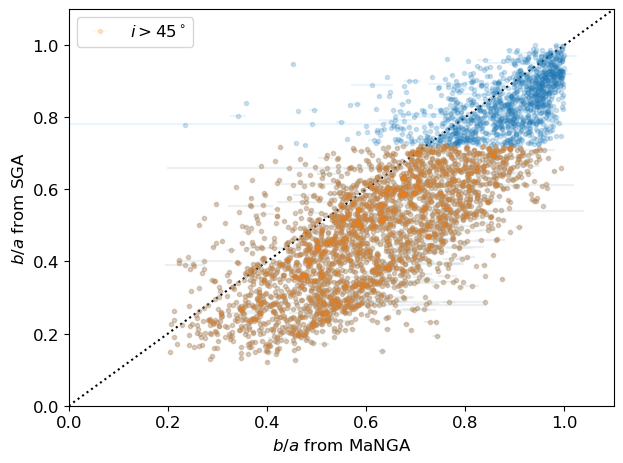

In [40]:
plt.figure(tight_layout=True)

plt.errorbar(SGA_MaNGA['ba_map'][final_sample], SGA_MaNGA['BA'][final_sample], 
             xerr=SGA_MaNGA['ba_err_map'][final_sample], 
             fmt='.', 
             ecolor='lightskyblue', 
             alpha=0.2)
plt.errorbar(SGA_MaNGA['ba_map'][final_sample_edge], SGA_MaNGA['BA'][final_sample_edge], 
             xerr=SGA_MaNGA['ba_err_map'][final_sample_edge], 
             fmt='.', 
             ecolor='bisque', 
             alpha=0.2, 
             label='$i > 45^\circ$')
plt.plot([0,1.1], [0,1.1], 'k:')

plt.xlim([0, 1.1])
plt.ylim([0, 1.1])

plt.legend()
             
plt.xlabel('$b/a$ from MaNGA')
plt.ylabel('$b/a$ from SGA');

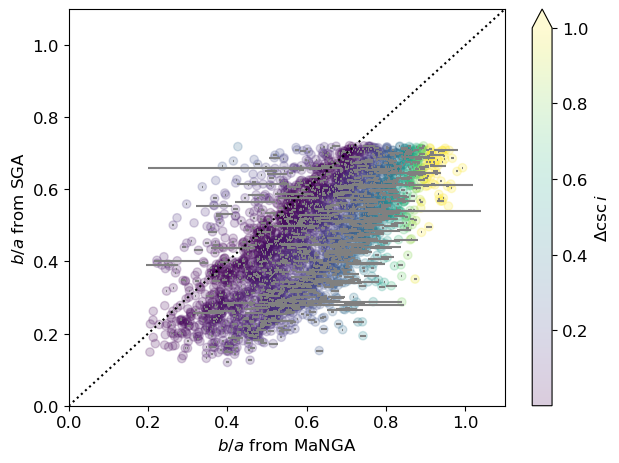

In [41]:
plt.figure(tight_layout=True)

plt.errorbar(SGA_MaNGA['ba_map'][final_sample_edge], SGA_MaNGA['BA'][final_sample_edge], 
             xerr=SGA_MaNGA['ba_err_map'][final_sample_edge], 
             fmt='None',
             ecolor='gray')
plt.scatter(SGA_MaNGA['ba_map'][final_sample_edge], SGA_MaNGA['BA'][final_sample_edge], 
            c=np.abs(SGA_MaNGA['delta_csci'][final_sample_edge]), 
            vmax=1, 
            alpha=0.2)
plt.plot([0,1.1], [0,1.1], 'k:')

plt.xlim([0, 1.1])
plt.ylim([0, 1.1])

plt.colorbar(label='$\Delta \csc i$', extend='max')

plt.xlabel('$b/a$ from MaNGA')
plt.ylabel('$b/a$ from SGA');

In [42]:
np.nanstd(SGA_MaNGA['delta_csci'][final_sample]), np.nanstd(SGA_MaNGA['delta_csci'][final_sample_edge])

/Users/kdouglass/miniforge3/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1899: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)


(np.float64(nan), np.float64(0.2891399434623702))

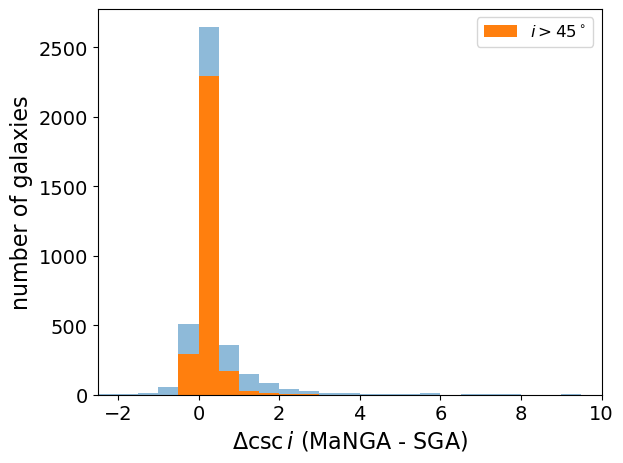

In [43]:
plt.figure(tight_layout=True)

plt.hist(SGA_MaNGA['delta_csci'][final_sample], 
         bins=np.arange(-20, 20, 0.5), 
         alpha=0.5)
plt.hist(SGA_MaNGA['delta_csci'][final_sample_edge], 
         bins=np.arange(-20, 20, 0.5), 
         label='$i > 45^\circ$')

plt.xlim([-2.5, 10])
# plt.ylim([0, 1100])

plt.legend()

plt.tick_params(axis='both', which='major', labelsize=14)

plt.xlabel(r'$\Delta \csc i$ (MaNGA - SGA)', fontsize=16)
plt.ylabel('number of galaxies', fontsize=16);

## $\Delta \phi$ as a function of axis ratio

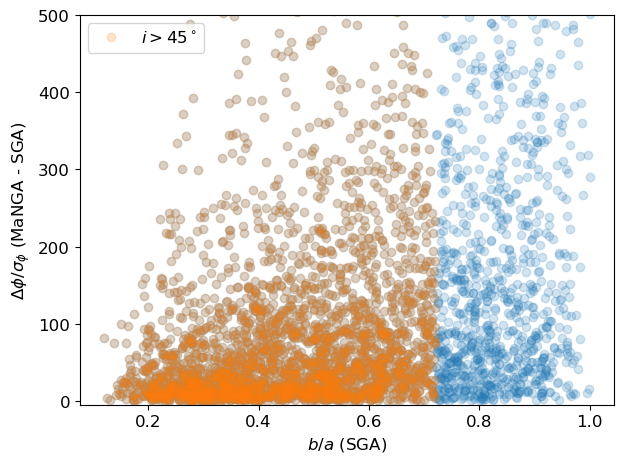

In [44]:
plt.figure(tight_layout=True)

plt.plot(SGA_MaNGA['BA'][final_sample], 
         np.abs(SGA_MaNGA['delta_phi'][final_sample])/SGA_MaNGA['phi_err_map'][final_sample], 
         'o', 
         alpha=0.2)
plt.plot(SGA_MaNGA['BA'][final_sample_edge], 
         np.abs(SGA_MaNGA['delta_phi'][final_sample_edge])/SGA_MaNGA['phi_err_map'][final_sample_edge], 
         'o', 
         alpha=0.2, 
         label='$i > 45^\circ$')

plt.ylim([-5, 500])

plt.legend()

plt.xlabel('$b/a$ (SGA)')
plt.ylabel('$\Delta \phi / \sigma_\phi$ (MaNGA - SGA)');

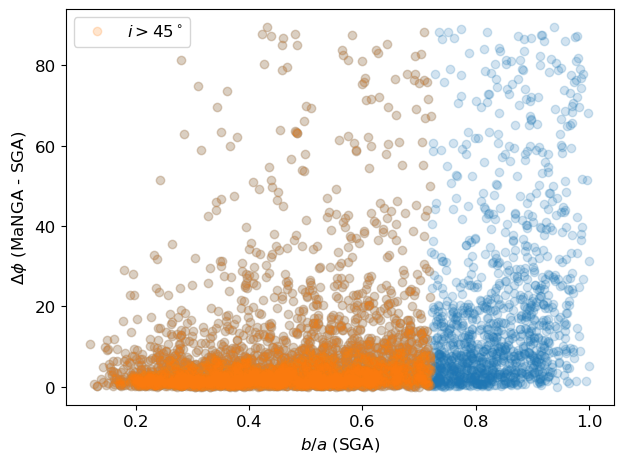

In [45]:
plt.figure(tight_layout=True)

plt.plot(SGA_MaNGA['BA'][final_sample], 
         np.abs(SGA_MaNGA['delta_phi'][final_sample]), 
         'o', 
         alpha=0.2)
plt.plot(SGA_MaNGA['BA'][final_sample_edge], 
         np.abs(SGA_MaNGA['delta_phi'][final_sample_edge]), 
         'o', 
         alpha=0.2, 
         label='$i > 45^\circ$')

# plt.ylim([-5, 45])

plt.legend(loc='upper left')

plt.xlabel('$b/a$ (SGA)')
plt.ylabel('$\Delta \phi$ (MaNGA - SGA)');

# Write $\Delta \phi$, $\Delta \csc i$, and $b/a$ to file

In [51]:
SGA_MaNGA[['SGA_ID', 'delta_phi', 'delta_csci', 'BA']][np.isfinite(SGA_MaNGA['delta_phi'])].write('SGA_MaNGAdr17-fits_dphi_dcsci-20240625.txt', 
                                                                                                  format='ascii.commented_header', 
                                                                                                  overwrite=True)

In [52]:
SGA_MaNGA[SGA_MaNGA['SGA_ID'] == 1379423]

plate,ifudsgn,plateifu,SGA_ID,R26,BA,PA,Vmax_map,Vmax_err_map,Rturn_map,alpha_map,ba_map,ba_err_map,ba_NSA,phi_map,phi_err_map,phi_NSA,Z_NSA,Vfit_R26,cosi2,delta_phi
int64,int64,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8588,3701,8588-3701,1379423,0.2516018748283386,0.8787551522254944,143.67311096191406,647.0456661600897,11.039919580490112,8.606542021289595,18.879595050578693,0.9647972453530611,0.0012141689442298623,0.823406,316.2170457930948,0.20497434039818163,148.417,0.130272,647.0456661551542,0.7627193932946373,-7.4560651688192365
8603,12701,8603-12701,1379423,0.2516018748283386,0.8787551522254944,143.67311096191406,526.840639877498,8.560342118009412,8.861486159183523,14.780498792156328,0.9448701528247039,0.0018638388549589058,0.823406,313.33770362174624,0.17292839312016448,148.417,0.130272,526.8406387946901,0.7627193932946373,-10.33540734016782
